In [76]:
import pandas as pd

# Load the CSV file to analyze the data
file_path = './Dragon_Ball_Data_Set.csv'
db_data = pd.read_csv(file_path)

# Preview the first few rows of the dataset
db_data.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5,Emperor Pilaf Saga,Dragon Ball


In [77]:
# Filter the data for the Dragon Ball Z series only and for the Z warriors
z_warriors = ['Goku', 'Gohan', 'Piccolo', 'Krillin', 'Yamcha', 'Tien', 'Chiaotzu', 'Vegeta']
dbz_sagas = [
    'Saiyan Saga', 'Namek Saga', 'Ginyu Force Saga', 'Captain Ginyu Saga', 'Frieza Saga',
    'Trunks Saga', 'Android Saga', 'Imperfect Cell Saga', 'Perfect Cell Saga', 'Cell Games Saga',
    'Great Saiyaman Saga/World Tournament Saga', 'Babidi Saga/Majin Buu Saga', 'Fusion Saga', 'Kid Buu Saga'
]


In [79]:
# Clean up the 'Saga_or_Movie' column to remove any extra spaces
db_data['Saga_or_Movie'] = db_data['Saga_or_Movie'].str.strip()

# Ensure 'Power_Level' is converted to string before removing commas
db_data['Power_Level'] = db_data['Power_Level'].astype(str).str.replace(',', '')

# Now convert 'Power_Level' to numeric, coercing errors to NaN
db_data['Power_Level'] = pd.to_numeric(db_data['Power_Level'], errors='coerce')

# Filter the dataset for any entry that contains a Z warrior's name as a substring
filtered_data = db_data[db_data['Character'].apply(lambda x: any(warrior in x for warrior in z_warriors))]

# Use .loc to avoid SettingWithCopyWarning
# Ensure the 'Saga_or_Movie' column respects the desired order
filtered_data.loc[:, 'Saga_or_Movie'] = pd.Categorical(filtered_data['Saga_or_Movie'], categories=dbz_sagas, ordered=True)

# Extract the warrior's name by checking which one exists in each Character entry
filtered_data.loc[:, 'Warrior'] = filtered_data['Character'].apply(lambda x: next((warrior for warrior in z_warriors if warrior in x), None))

# Group by extracted warrior name and saga to compute the average power levels
average_power_levels = filtered_data.groupby(['Warrior', 'Saga_or_Movie'])['Power_Level'].mean().reset_index()

# Sort the dataframe by 'Saga_or_Movie' to ensure the X-axis is ordered correctly
average_power_levels = average_power_levels.sort_values('Saga_or_Movie')

average_power_levels

C:\Users\anbar\AppData\Local\Temp\ipykernel_39604\4238142887.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'Saga_or_Movie'] = pd.Categorical(filtered_data['Saga_or_Movie'], categories=dbz_sagas, ordered=True)
C:\Users\anbar\AppData\Local\Temp\ipykernel_39604\4238142887.py:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered_data.loc[:, 'Saga_or_Movie'] = pd.Categorical(filtered_data['Saga_or_Movie'], categories=dbz_sagas, ordered=True)
C:\Users\anbar\AppData\Local\Temp\ipykernel_39604\42381

,Warrior,Saga_or_Movie,Power_Level
0,Chiaotzu,Saiyan Saga,1.531667e+03
56,Piccolo,Saiyan Saga,1.395667e+03
28,Goku,Saiyan Saga,4.155371e+04
70,Tien,Saiyan Saga,2.020000e+03
42,Krillin,Saiyan Saga,1.553500e+03
...,...,...,...
41,Goku,Kid Buu Saga,1.620833e+12
27,Gohan,Kid Buu Saga,2.013333e+12
13,Chiaotzu,Kid Buu Saga,NaN
97,Vegeta,Kid Buu Saga,6.841500e+11


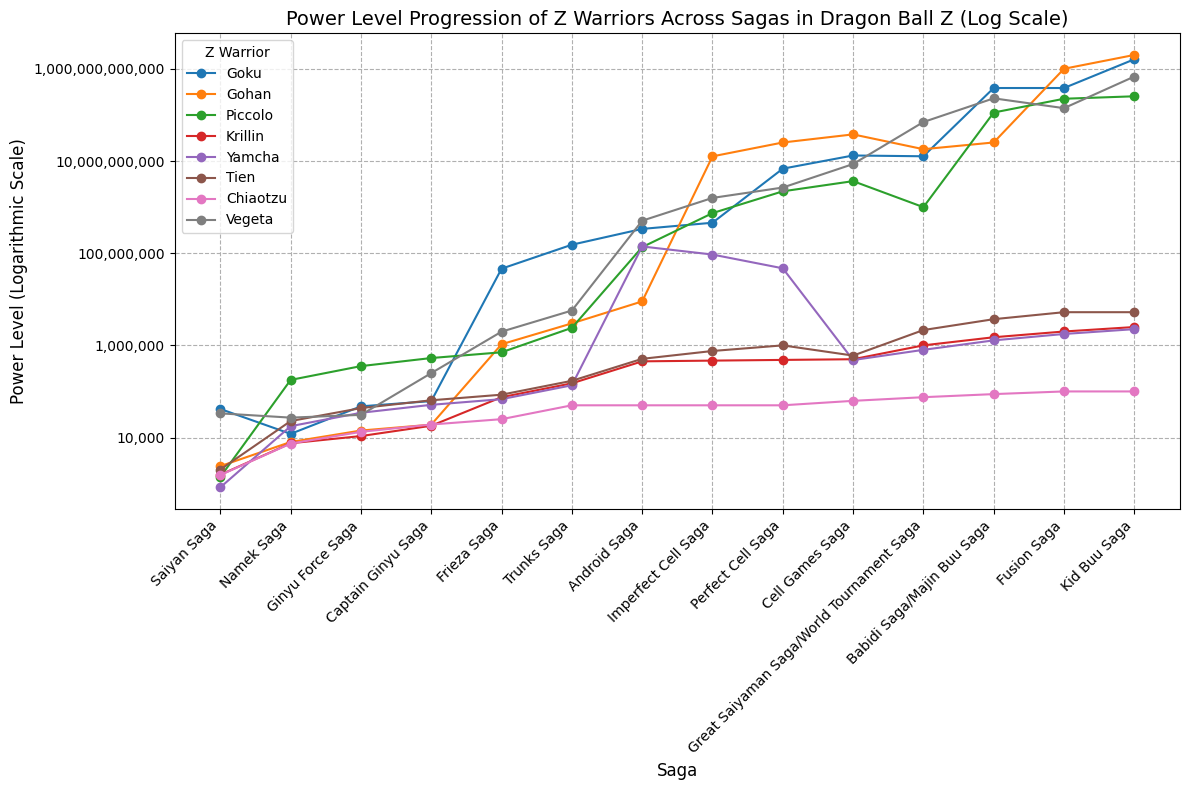

In [86]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Interpolate the missing values for each warrior's power levels across sagas
# Drop any duplicate 'Warrior' column during reset_index
interpolated_data = (
    average_power_levels.groupby('Warrior')
    .apply(lambda group: group.set_index('Saga_or_Movie').reindex(dbz_sagas).interpolate(method='linear').ffill().bfill())
    .reset_index(level='Saga_or_Movie')  # Only reset the 'Saga_or_Movie' index
)

# Plot a line chart for each Z warrior's power level progression across the sagas
plt.figure(figsize=(12, 8))

for warrior in z_warriors:
    warrior_data = interpolated_data[interpolated_data.index == warrior]
    plt.plot(warrior_data['Saga_or_Movie'], warrior_data['Power_Level'], marker='o', label=warrior)

# Explicitly set the X-axis order using dbz_sagas
plt.xticks(ticks=range(len(dbz_sagas)), labels=dbz_sagas, rotation=45, ha='right')

# Set the Y-axis to a logarithmic scale
plt.yscale('log')

# Format the Y-axis with a logarithmic scale and add commas for readability
ax = plt.gca()  # Get current axis
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Power Level Progression of Z Warriors Across Sagas in Dragon Ball Z (Log Scale)', fontsize=14)
plt.xlabel('Saga', fontsize=12)
plt.ylabel('Power Level (Logarithmic Scale)', fontsize=12)
plt.grid(True, which="both", ls="--")  # Show grid lines on both major and minor ticks
plt.legend(title='Z Warrior')
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Ensure we fill missing power levels with interpolated values to connect lines
# Interpolate the missing values for each warrior's power levels across sagas
interpolated_data = average_power_levels.groupby('Warrior').apply(lambda group: group.set_index('Saga_or_Movie').reindex(dbz_sagas).interpolate(method='linear').ffill().bfill()).reset_index()

# Plot a line chart for each Z warrior's power level progression across the sagas
plt.figure(figsize=(12, 8))

for warrior in z_warriors:
    warrior_data = interpolated_data[interpolated_data['Warrior'] == warrior]
    plt.plot(warrior_data['Saga_or_Movie'], warrior_data['Power_Level'], marker='o', label=warrior)

# Explicitly set the X-axis order using dbz_sagas
plt.xticks(ticks=range(len(dbz_sagas)), labels=dbz_sagas, rotation=45, ha='right')

# Set the Y-axis to a logarithmic scale
plt.yscale('log')

# Format the Y-axis with a logarithmic scale and add commas for readability
ax = plt.gca()  # Get current axis
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Power Level Progression of Z Warriors Across Sagas in Dragon Ball Z (Log Scale)', fontsize=14)
plt.xlabel('Saga', fontsize=12)
plt.ylabel('Power Level (Logarithmic Scale)', fontsize=12)
plt.grid(True, which="both", ls="--")  # Show grid lines on both major and minor ticks
plt.legend(title='Z Warrior')
plt.tight_layout()

# Display the plot
plt.show()


ValueError: cannot insert Warrior, already exists